In [1]:
from sklearn import datasets
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [6]:
work_directory = "../../combustiveis/"
dataset_name = "dataset_etanol_gasolina_sp.csv"

df_original = pd.read_csv(work_directory + dataset_name, sep=",", decimal=".", encoding="cp860", index_col=False)

In [ ]:
df_original.head()

In [14]:
df = df_original

In [15]:
df = df[["Produto", "Valor de Compra", "Valor de Venda"]]

In [16]:
df = df.dropna()

In [25]:
df.head()

,Produto,Valor de Compra,Valor de Venda
0,ETANOL,1.1436,1.379
1,ETANOL,1.5776,1.699
2,ETANOL,1.2550,1.679
3,ETANOL,2.2371,2.599
4,ETANOL,1.1744,1.299


In [18]:
contadores = df["Produto"].value_counts()

print(contadores)


GASOLINA    1106570
ETANOL      1066941
Name: Produto, dtype: int64


<AxesSubplot:xlabel='Produto', ylabel='count'>

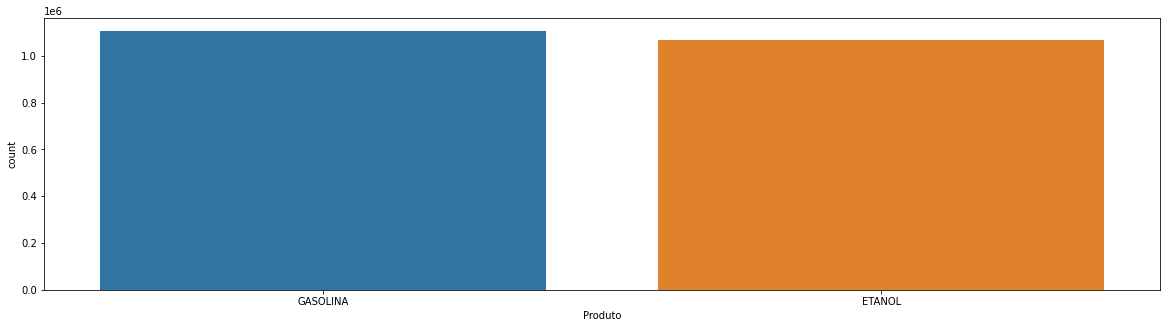

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x="Produto", data=df, ax=ax)

<AxesSubplot:xlabel='Produto', ylabel='count'>

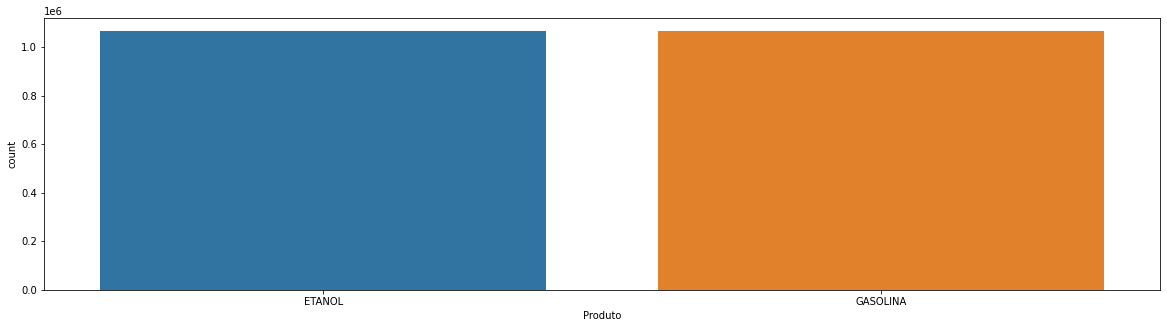

In [21]:
df_geral = pd.DataFrame()

labels = np.unique(df["Produto"])

for label in labels:
    periodo_subset = df.loc[df["Produto"] == label, :]
    sampled = periodo_subset.sample(1066941)
    df_geral = pd.concat([df_geral, sampled], ignore_index=True)

df = df_geral

fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x="Produto", data=df, ax=ax)


# Realizando Regressão Logística

In [27]:
from sklearn.preprocessing import StandardScaler

# Definindo valores que serão utilizados
X = df[["Valor de Venda", "Valor de Compra"]].values
Y = df['Produto'].values

# Scaling
sc_x = StandardScaler()
sc_y = StandardScaler()

x_std = sc_x.fit_transform(X)

# Separando dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Treinando o classificador
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

<AxesSubplot:xlabel='Predito', ylabel='Atual'>

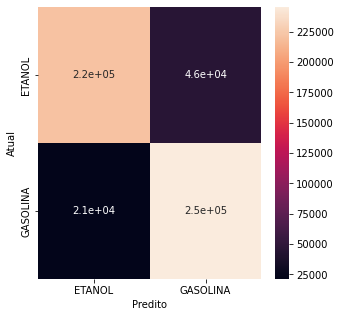

In [30]:
# Visualizando matriz de confusão
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Atual'], colnames=['Predito'])

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_matrix, annot=True, ax=ax)

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

In [29]:
logisticRegression = LogisticRegression()

logisticRegression.fit(X_train, y_train)

score = logisticRegression.score(X_test, y_test)

print("Acurácia geral: ", score)

Acurácia geral:  0.8741393627769832
